In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
intervensi_df = pd.read_csv('dataset_intervensi_stunting_revisi.csv', sep=';')
deskripsi_df = pd.read_excel('Deskripsi Intervensi.xlsx')

In [14]:
intervensi_df.head()

,usia_ibu,pendidikan_terakhir,pekerjaan,jarak_ke_faskes_km,jumlah_anak,status_pernikahan,kepesertaan_BPJS,frekuensi_kunjungan_hamil,usia_anak_bulan,berat_badan_kg,tinggi_badan_cm,status_imunisasi,status_asi,jenis_kelamin,riwayat_diare_infeksi,nafsu_makan_anak,frekuensi_makan_per_hari,pencegahan
0,24,SMP,IRT,11.28,4,Menikah,Ya,3,43,8.2,87.0,Lengkap,Eksklusif,Laki-laki,Tidak,Cukup,2,Pemberian Makanan Tambahan
1,37,SMP,Wirausaha,12.15,4,Menikah,Ya,2,7,6.0,64.0,Tidak Lengkap,Eksklusif,Laki-laki,Tidak,Banyak,4,Kontrol Rutin ke Puskesmas
2,32,SD,Buruh,15.78,2,Belum Menikah,Ya,3,41,13.9,88.3,Lengkap,Eksklusif,Perempuan,Tidak,Cukup,2,Pemberian Makanan Tambahan
3,28,SMA,Buruh,9.88,2,Menikah,Ya,2,59,16.1,105.4,Lengkap,Eksklusif,Laki-laki,Tidak,Cukup,4,Kontrol Rutin ke Puskesmas
4,25,SMA,IRT,1.29,3,Menikah,Ya,1,31,5.5,79.8,Lengkap,Tidak Eksklusif,Perempuan,Tidak,Cukup,4,Kontrol Rutin ke Puskesmas


In [4]:
deskripsi_df

,Kontrol Rutin ke Puskesmas,Edukasi Gizi,Pemberian Makanan Tambahan (PMT),Lainnya
0,Kontrol rutin ke puskesmas merupakan langkah p...,Edukasi gizi memberikan pengetahuan penting ba...,Pemberian Makanan Tambahan (PMT) menjadi solus...,Kategori “Lainnya” mencakup berbagai bentuk in...


In [16]:
X = intervensi_df.drop("pencegahan", axis=1)
y = intervensi_df["pencegahan"]

In [18]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = X.select_dtypes(include="object").columns
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Train model
# model = KNeighborsClassifier(n_neighbors=5)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

              Edukasi Gizi       1.00      0.57      0.73        14
Kontrol Rutin ke Puskesmas       1.00      1.00      1.00        30
                   Lainnya       0.86      1.00      0.92        36
Pemberian Makanan Tambahan       1.00      1.00      1.00        70

                  accuracy                           0.96       150
                 macro avg       0.96      0.89      0.91       150
              weighted avg       0.97      0.96      0.96       150



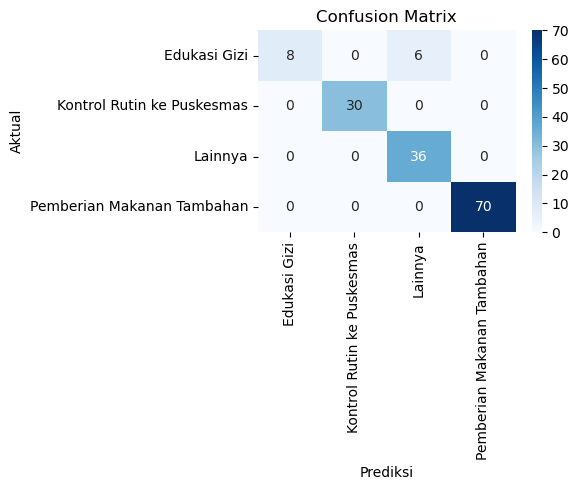

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [9]:
new_data = pd.DataFrame([{
    'usia_ibu': 27,
    'pendidikan_terakhir': 'SMA',
    'pekerjaan': 'IRT',
    'jarak_ke_faskes_km': 4.0,
    'jumlah_anak': 3,
    'status_pernikahan': 'Menikah',
    'kepesertaan_BPJS': 'Ya',
    'frekuensi_kunjungan_hamil': 1,  # KUNJUNGAN RENDAH
    'usia_anak_bulan': 18,
    'berat_badan_kg': 11.0,
    'tinggi_badan_cm': 85,
    'status_imunisasi': 'Lengkap',
    'status_asi': 'Eksklusif',
    'jenis_kelamin': 'Laki-laki',
    'riwayat_diare_infeksi': 'Tidak',
    'nafsu_makan_anak': 'Cukup',
    'frekuensi_makan_per_hari': 3
}])


In [10]:
# Salin dan encode
new_data_encoded = new_data.copy()
new_data_encoded[categorical_cols] = encoder.transform(new_data_encoded[categorical_cols])

new_data_encoded = new_data_encoded[X.columns]

new_data_scaled = scaler.transform(new_data_encoded)

prediksi_intervensi = model.predict(new_data_scaled)
intervensi = prediksi_intervensi[0]
deskripsi = deskripsi_df[intervensi].values[0]

print("Rekomendasi intervensi:", prediksi_intervensi[0])
print('\n' + deskripsi)

Rekomendasi intervensi: Kontrol Rutin ke Puskesmas

Kontrol rutin ke puskesmas merupakan langkah penting untuk memantau tumbuh kembang anak secara berkala. Melalui pemeriksaan tinggi, berat badan, serta lingkar kepala, petugas kesehatan dapat mendeteksi dini risiko stunting, gizi buruk, atau gangguan perkembangan lainnya. Deteksi dini ini memungkinkan intervensi cepat sebelum kondisi menjadi kronis atau menghambat kemampuan belajar dan kesehatan anak jangka panjang.

Selain itu, kontrol rutin membuka akses orang tua pada layanan kesehatan seperti imunisasi, konseling gizi, hingga pemberian suplemen atau rujukan bila diperlukan. Kunjungan ini juga menjadi momen edukasi langsung dengan tenaga kesehatan, membangun kepercayaan, serta memperkuat relasi antara keluarga dan fasilitas pelayanan. Dengan komitmen kontrol rutin, keluarga menunjukkan kepedulian aktif terhadap masa depan anak.
